# IMPORTING LIBRARIES

In [1]:
import os
import cv2
import face_recognition as fg
import plotly.express as plt

# LISTING ALL THE FILES IN THE DIRECTORY

In [2]:
known_images = os.listdir("known")
unknown_images = os.listdir("unknown")
    
known = ["./known/" + filename for filename in known_images]
names = [name[:-4].title() for name in known_images]
print(known, names, sep = "\n")

['./known/shahzaib.jpg', './known/farooq.jpg', './known/talha.jpg', './known/raheel.jpg']
['Shahzaib', 'Farooq', 'Talha', 'Raheel']


In [3]:
unknown_images

['group.JPG',
 'group_3.JPG',
 'unknown.JPG',
 'group_2.JPG',
 'group_6.JPG',
 'group_5.JPG',
 'unknown_2.jpg',
 'unknown_3.jpg',
 'group_4.JPG']

# GETTING FACE LOCATIONS

In [4]:
for face in known:
    img = cv2.imread(face, 1)
    face_locations = fg.face_locations(img)[0]
    print(face_locations)

(116, 442, 270, 287)
(171, 646, 439, 379)
(66, 444, 156, 354)
(376, 1103, 761, 718)


# GETTING FACE ENCODINGS

In [5]:
known_face_encodings = []

for face in known:
    img = cv2.imread(face, 1)
    face_encodings = fg.face_encodings(img)[0]
    known_face_encodings.append(face_encodings)
    
known_face_encodings

[array([-1.39480501e-01,  1.27936989e-01,  2.33381819e-02, -7.39326626e-02,
        -1.02229998e-01, -1.69161484e-02, -3.59070674e-02, -5.49770370e-02,
         2.30327487e-01, -6.77812994e-02,  2.30129272e-01,  7.64509663e-02,
        -1.23909272e-01, -7.09787160e-02,  9.61113721e-03,  9.09242481e-02,
        -1.53891936e-01, -1.98399767e-01, -5.70304096e-02, -8.26027393e-02,
        -2.08778810e-02,  3.09315734e-02, -6.35640025e-02,  4.62758839e-02,
        -1.63972035e-01, -3.04575264e-01, -4.49372977e-02, -7.50688538e-02,
         9.70161259e-02, -4.37425524e-02, -1.82509087e-02,  6.15958236e-02,
        -2.15809762e-01, -6.97659329e-02,  4.68793660e-02,  1.57175735e-01,
        -9.30764526e-03,  2.42450088e-03,  1.75219715e-01,  3.04673743e-02,
        -1.53825045e-01,  3.63036990e-03,  9.59527194e-02,  2.72738338e-01,
         1.85245693e-01,  3.13409343e-02,  8.48844275e-02, -2.79667675e-02,
         8.15051198e-02, -2.44953737e-01,  1.27897233e-01,  1.39006302e-01,
         1.3

In [6]:
lst = []

In [7]:
names

['Shahzaib', 'Farooq', 'Talha', 'Raheel']

# COMPARING FACES

In [10]:
for image in unknown_images:
    img = cv2.imread("./unknown/" + image)
    locations = fg.face_locations(img)
    unknow_face_encoding = fg.face_encodings(img, locations)
    for location, un_face_ed in zip(locations, unknow_face_encoding):
        try:
            top, right, bottom, left = location
            img = cv2.rectangle(img, (left, top),
                                (right, bottom),
                                (255,255,255), 2)
            img = cv2.rectangle(img, (right + 1, bottom),
                                (left - 1, bottom + 20),
                                (255,255,255), -1)
            person_name = "Unknown"
            result = fg.compare_faces(known_face_encodings, un_face_ed, tolerance = 0.53)
            if True in result:
                person_name = names[result.index(True)]
                
            print(result)

            img = cv2.putText(img, person_name, (left + 5, bottom + 15),
                              cv2.FONT_HERSHEY_SIMPLEX,  0.5, (0,0,0), 1, cv2.LINE_AA) 

        except Exception as err:
            print(err)

    lst.append(img[:, :, ::-1])

[False, True, False, False]
[False, False, False, True]
[False, False, True, False]
[False, False, True, False]
[False, False, True, False]
[True, False, False, False]
[False, False, False, True]
[False, False, False, True]
[False, True, False, False]
[False, False, False, True]
[False, True, False, False]
[False, False, True, False]
[True, False, False, False]
[False, True, False, False]
[False, True, False, False]
[False, False, False, True]


# SHOWING IMAGES


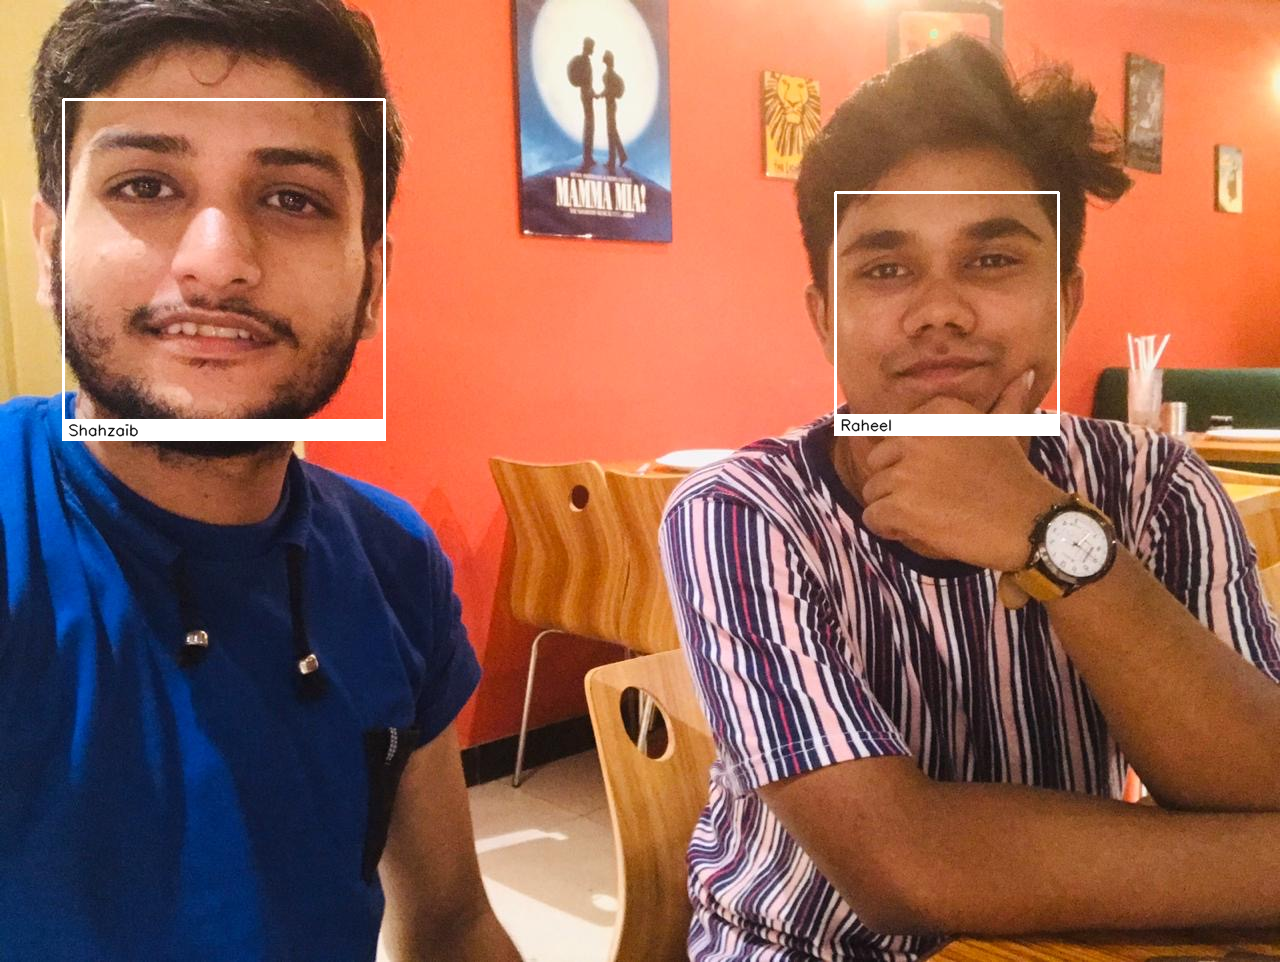

In [14]:
plt.imshow(lst[4])